In [1]:
# Standard Imports
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure the scripts directory is in sys.path
sys.path.append(os.path.abspath("../scripts"))

# Import the custom load function
from load_data import load_data


In [5]:
# Choose one dataset to analyze (adjust filename as needed)
df_a1 = load_data("04-03-24", "A1.csv")

# Display first few rows
df_a1

,mode,ox/red,error,control changes,Ns changes,counter inc.,Ns,I Range,time/s,control/V/mA,...,x,Q discharge/mA.h,Q charge/mA.h,Capacity/mA.h,Efficiency/%,control/V,control/mA,cycle number,P/W,R/Ohm
0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,115.0,0.0,0.00,...,1.00,0.0,0.00000,0.00000,0.0,0.00,0.0,0.0,0.000,0.000
1,2.0,1.0,0.0,1.0,1.0,0.0,1.0,112.0,15.4,3.52,...,1.00,0.0,0.00751,0.00751,0.0,3.52,0.0,0.0,0.399,31.100
2,2.0,0.0,0.0,1.0,0.0,0.0,1.0,112.0,18.6,3.52,...,1.00,0.0,0.03190,0.03190,0.0,3.52,0.0,0.0,-1.170,10.500
3,2.0,0.0,0.0,1.0,0.0,0.0,1.0,112.0,21.8,3.52,...,1.00,0.0,0.05460,0.05460,0.0,3.52,0.0,0.0,-1.990,6.190
4,2.0,0.0,0.0,1.0,0.0,0.0,1.0,112.0,25.0,3.52,...,1.00,0.0,0.07770,0.07770,0.0,3.52,0.0,0.0,-0.727,17.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80450,1.0,0.0,0.0,1.0,0.0,0.0,3.0,112.0,2420000.0,8000.00,...,-1.49,0.0,0.00444,0.00444,0.0,0.00,8000.0,268.0,29.400,0.460
80451,1.0,1.0,0.0,1.0,1.0,0.0,3.0,112.0,2420000.0,8000.00,...,-1.49,0.0,0.00889,0.00889,0.0,0.00,8000.0,268.0,29.500,0.460
80452,1.0,1.0,0.0,1.0,0.0,0.0,3.0,112.0,2420000.0,8000.00,...,-1.52,0.0,133.00000,133.00000,0.0,0.00,8000.0,268.0,31.100,0.486
80453,1.0,1.0,0.0,1.0,0.0,0.0,3.0,112.0,2420000.0,8000.00,...,-1.54,0.0,200.00000,200.00000,0.0,0.00,8000.0,268.0,31.300,0.489


In [8]:
# Select only datasets where Ns is 1 or 6, and cycle number is not 0
if "#NAME?" in df_a1.columns.values : df_a1 = df_a1.rename(columns={"#NAME?": "Im(Z)/Ohm"})

filtered_df = df_a1.loc[(df_a1['Ns'].isin([1, 6])) & (df_a1['cycle number'] != 0)].copy()

# Extract Real and Imaginary impedance values
Re_Z = filtered_df['Re(Z)/Ohm'].values
Im_Z = filtered_df['Im(Z)/Ohm'].values

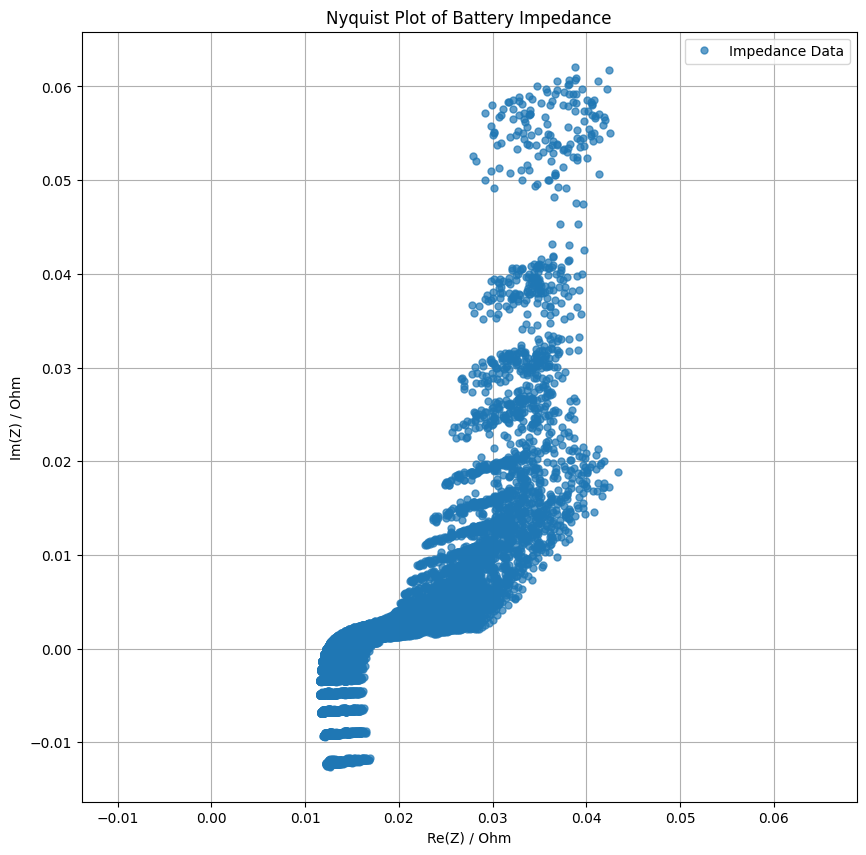

In [9]:
# Create Nyquist plot
fig = plt.figure(figsize=(10, 10))  # Store figure in a variable
plt.plot(Re_Z, Im_Z, 'o', markersize=5, alpha=0.7, label="Impedance Data")

# Labels and formatting
plt.xlabel('Re(Z) / Ohm')
plt.ylabel('Im(Z) / Ohm')
plt.title('Nyquist Plot of Battery Impedance')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()  # Show the plot, but don't save yet


In [7]:
fig.savefig("../results/nyquist_plot_A1.png", bbox_inches='tight')